**Respiratory Sound Database - Clustering**

**Zeyyan(231221), Saleha(231209), Isfah (231207), Talha (231223)**

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

**Load Respiratory Audio Files + Extract MFCC Features**

In [ ]:
# Path to your dataset
DATASET_PATH = "/content/drive/MyDrive/Respiratory_Sound_Database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files"

# Storage for extracted features
feature_list = []
file_names = []

for file in os.listdir(DATASET_PATH):
    if file.endswith(".wav"):
        file_path = os.path.join(DATASET_PATH, file)

        # Load audio
        y, sr = librosa.load(file_path, sr=None)

        # Extract 20 MFCCs
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        mfcc_mean = np.mean(mfcc, axis=1)  # mean across frames

        feature_list.append(mfcc_mean)
        file_names.append(file)

# Convert to DataFrame
df = pd.DataFrame(feature_list)
df['file'] = file_names

print("Shape of extracted features:", df.shape)
df.head()


Shape of extracted features: (920, 21)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,file
0,-378.701111,102.320877,64.576675,34.800297,22.422129,20.237692,20.691111,20.828270,19.569427,17.258892,...,13.152844,11.310820,9.598357,8.182693,7.046137,6.324503,6.183874,6.436949,6.630281,160_1b3_Al_mc_AKGC417L.wav
1,-377.756226,82.169220,60.898384,39.419956,26.026798,21.340446,21.196102,21.515774,20.645317,18.822872,...,14.593758,12.483456,10.431065,8.723929,7.686054,7.372684,7.530971,7.809794,7.936250,160_1b2_Ar_mc_AKGC417L.wav
2,-413.291473,101.056137,46.609695,42.462738,31.222513,27.055023,23.313892,19.456230,17.272923,14.091174,...,10.684888,7.819309,7.567657,5.293930,5.886797,5.030015,5.648086,5.954294,5.594142,160_1b3_Pl_mc_AKGC417L.wav
3,-388.753235,79.306252,67.624268,53.866726,41.208958,31.242184,24.288982,19.828220,17.079920,15.338109,...,12.771452,11.383417,9.854658,8.316113,7.015061,6.145881,5.699650,5.519268,5.449126,160_1b4_Lr_mc_AKGC417L.wav
4,-331.610260,118.110054,56.069805,24.583729,24.017574,27.476910,25.128212,19.375793,13.717404,10.995266,...,12.444757,11.335817,10.303181,7.713240,5.531509,4.653378,5.370899,4.802866,4.201637,160_1b2_Tc_mc_AKGC417L.wav


**Standardize Numerical Features**

In [ ]:
X = df.drop(columns=['file']).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Standardization completed.")

Standardization completed.


**K-Means — Elbow Method**

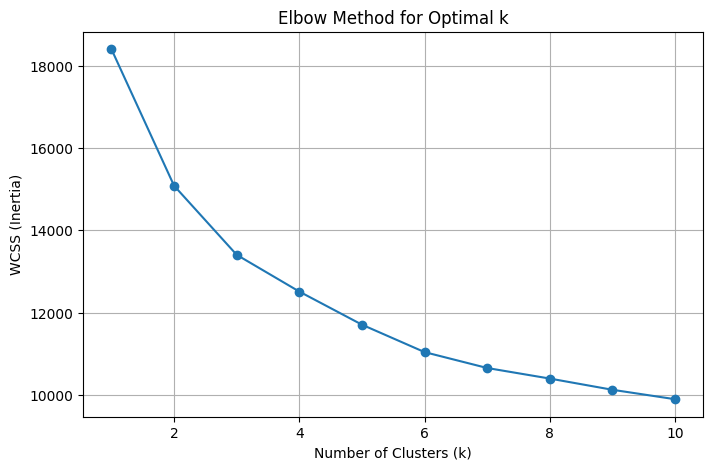

In [ ]:
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.show()

**Final K-Means Clustering (Choose k after elbow plot)**

In [ ]:
optimal_k = 4   # change this depending on your elbow plot

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init='auto', random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

df['KMeans_Cluster'] = labels_kmeans
df.head()


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,file,KMeans_Cluster
0,-378.701111,102.320877,64.576675,34.800297,22.422129,20.237692,20.691111,20.828270,19.569427,17.258892,...,11.310820,9.598357,8.182693,7.046137,6.324503,6.183874,6.436949,6.630281,160_1b3_Al_mc_AKGC417L.wav,3
1,-377.756226,82.169220,60.898384,39.419956,26.026798,21.340446,21.196102,21.515774,20.645317,18.822872,...,12.483456,10.431065,8.723929,7.686054,7.372684,7.530971,7.809794,7.936250,160_1b2_Ar_mc_AKGC417L.wav,3
2,-413.291473,101.056137,46.609695,42.462738,31.222513,27.055023,23.313892,19.456230,17.272923,14.091174,...,7.819309,7.567657,5.293930,5.886797,5.030015,5.648086,5.954294,5.594142,160_1b3_Pl_mc_AKGC417L.wav,3
3,-388.753235,79.306252,67.624268,53.866726,41.208958,31.242184,24.288982,19.828220,17.079920,15.338109,...,11.383417,9.854658,8.316113,7.015061,6.145881,5.699650,5.519268,5.449126,160_1b4_Lr_mc_AKGC417L.wav,3
4,-331.610260,118.110054,56.069805,24.583729,24.017574,27.476910,25.128212,19.375793,13.717404,10.995266,...,11.335817,10.303181,7.713240,5.531509,4.653378,5.370899,4.802866,4.201637,160_1b2_Tc_mc_AKGC417L.wav,3


**Cluster Visualization (PCA 2D)**

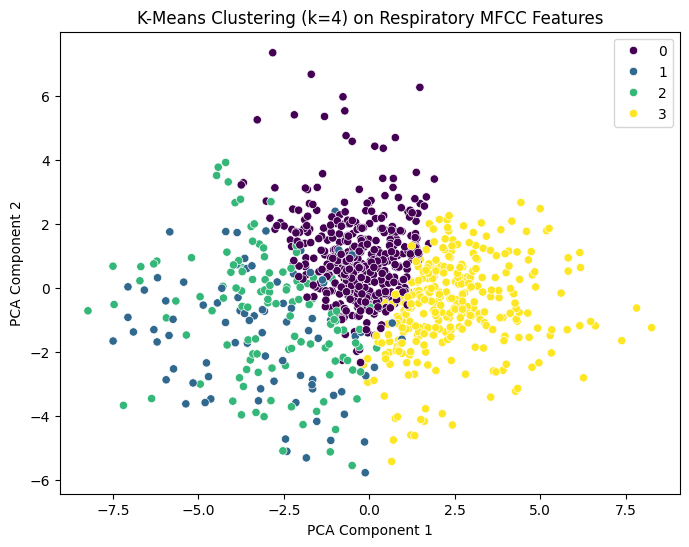

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_kmeans, palette="viridis")
plt.title(f"K-Means Clustering (k={optimal_k}) on Respiratory MFCC Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

**Hierarchical Clustering — Dendrogram**

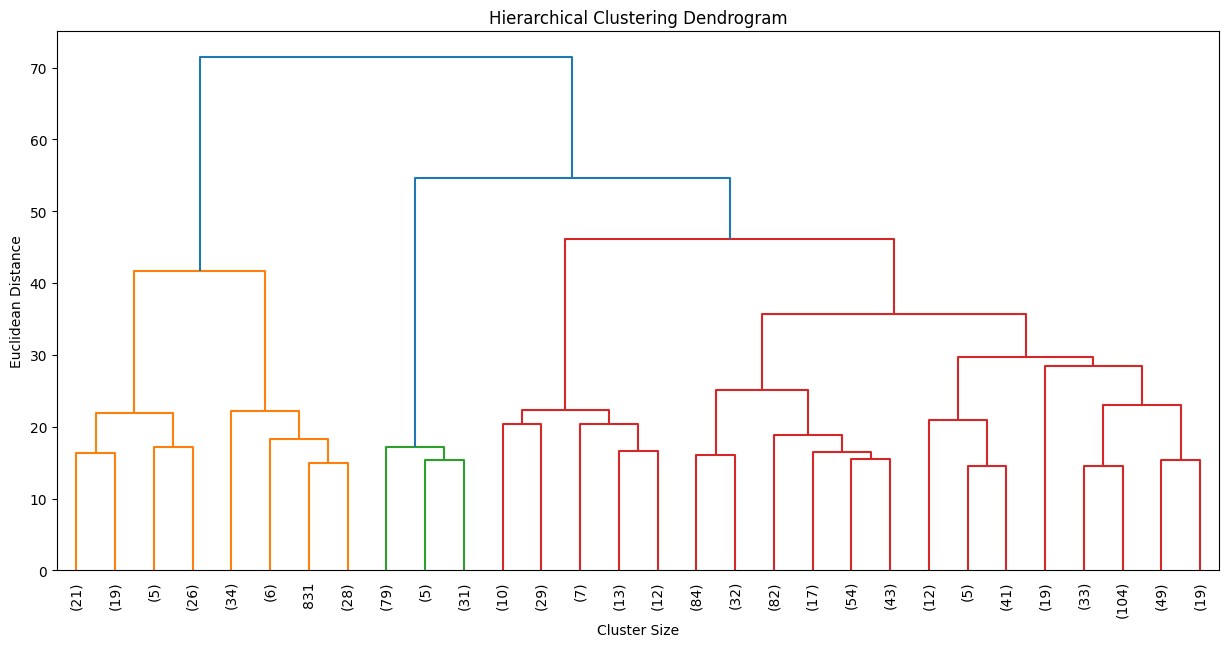

In [ ]:
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(15, 7))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Euclidean Distance")
plt.show()


**Agglomerative Clustering**

In [ ]:
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
labels_hc = hc.fit_predict(X_scaled)

df['HC_Cluster'] = labels_hc
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,file,KMeans_Cluster,HC_Cluster
0,-378.701111,102.320877,64.576675,34.800297,22.422129,20.237692,20.691111,20.828270,19.569427,17.258892,...,9.598357,8.182693,7.046137,6.324503,6.183874,6.436949,6.630281,160_1b3_Al_mc_AKGC417L.wav,3,2
1,-377.756226,82.169220,60.898384,39.419956,26.026798,21.340446,21.196102,21.515774,20.645317,18.822872,...,10.431065,8.723929,7.686054,7.372684,7.530971,7.809794,7.936250,160_1b2_Ar_mc_AKGC417L.wav,3,2
2,-413.291473,101.056137,46.609695,42.462738,31.222513,27.055023,23.313892,19.456230,17.272923,14.091174,...,7.567657,5.293930,5.886797,5.030015,5.648086,5.954294,5.594142,160_1b3_Pl_mc_AKGC417L.wav,3,1
3,-388.753235,79.306252,67.624268,53.866726,41.208958,31.242184,24.288982,19.828220,17.079920,15.338109,...,9.854658,8.316113,7.015061,6.145881,5.699650,5.519268,5.449126,160_1b4_Lr_mc_AKGC417L.wav,3,1
4,-331.610260,118.110054,56.069805,24.583729,24.017574,27.476910,25.128212,19.375793,13.717404,10.995266,...,10.303181,7.713240,5.531509,4.653378,5.370899,4.802866,4.201637,160_1b2_Tc_mc_AKGC417L.wav,3,1


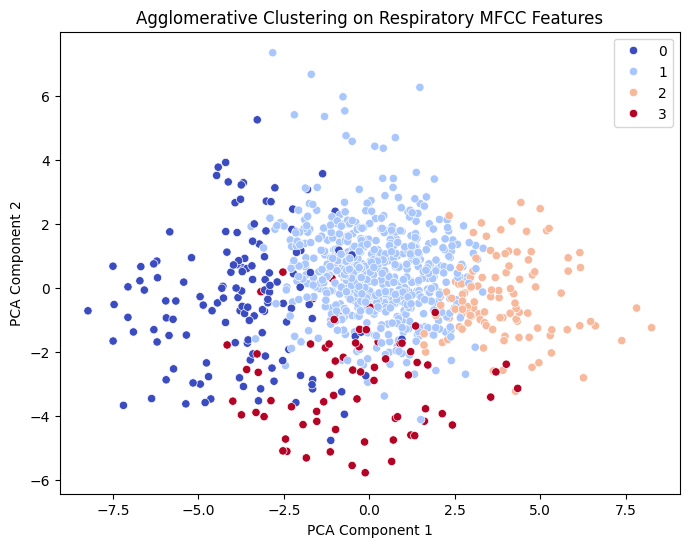

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_hc, palette="coolwarm")
plt.title("Agglomerative Clustering on Respiratory MFCC Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

**First 20 Cluster Assignments**

In [ ]:
df[['file', 'KMeans_Cluster', 'HC_Cluster']].head(20)

,file,KMeans_Cluster,HC_Cluster
0,160_1b3_Al_mc_AKGC417L.wav,3,2
1,160_1b2_Ar_mc_AKGC417L.wav,3,2
2,160_1b3_Pl_mc_AKGC417L.wav,3,1
3,160_1b4_Lr_mc_AKGC417L.wav,3,1
4,160_1b2_Tc_mc_AKGC417L.wav,3,1
5,160_1b3_Lr_mc_AKGC417L.wav,3,1
6,159_1b1_Ll_sc_Meditron.wav,3,2
7,160_1b3_Tc_mc_AKGC417L.wav,0,1
8,160_1b3_Ar_mc_AKGC417L.wav,3,2
9,160_1b4_Pl_mc_AKGC417L.wav,3,1


# **Report — Respiratory Sound Clustering Using MFCC Features**

**Dataset:** Respiratory Sound Database  
**Techniques Used:** MFCC Extraction, Standardization, K-Means, Hierarchical Clustering, PCA  
**Students:** Zeyyan (231221), Saleha (231209), Isfah (231207), Talha (231223)

---

## **1. Feature Extraction**

MFCC features were extracted from each respiratory audio file to represent the spectral characteristics of breathing sounds. These MFCC vectors were combined to form the final feature dataset used for clustering.

---

## **2. Data Standardization**

All MFCC features were standardized using `StandardScaler()` to ensure equal contribution of every feature during clustering.  
Standardization was necessary because MFCC values vary in magnitude and clustering algorithms rely heavily on distance calculations.

---

## **3. K-Means Clustering**

- The Elbow Method was applied for **k = 1 to 10**.
- The WCSS curve showed a clear bend at **k = 4**, indicating that **four clusters** best represent the data.

A K-Means model with **k = 4** was trained.  
PCA-based visualization showed distinctly separated clusters, representing different respiratory sound patterns.

---

## **4. Hierarchical Clustering**

- A dendrogram was generated using **Ward’s linkage method**.
- Large vertical separation between the final merges confirmed **four natural clusters** within the MFCC feature space.

Agglomerative Clustering (`n_clusters=4`) also produced four clusters, similar to K-Means.  
This consistency strengthens confidence in the clustering structure.

---

## **5. Interpretation**

Both clustering algorithms separated the respiratory audio data into **four groups**.  
These clusters likely represent different physiological breathing characteristics such as:

- **Wheezes**
- **Crackles**
- **Normal breathing**
- **Mixed or irregular patterns**

---

## **Conclusion**

K-Means and Hierarchical Clustering consistently identified **four meaningful clusters** in the respiratory sound dataset.  
This demonstrates that MFCC-based feature extraction effectively captures important acoustic variations in respiratory audio, enabling unsupervised grouping into clinically relevant sound categories.

---
